In [11]:
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%%time
import pickle
with open('page_dict.p', 'rb') as fp:
    page_dict = pickle.load(fp)

CPU times: user 5.95 s, sys: 2.82 s, total: 8.77 s
Wall time: 12.2 s


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
train_data = pd.read_csv('./anomaly-detection-competition-ml1-ts-spring-2020/train_groups.csv')

In [5]:
test_data = pd.read_csv('./anomaly-detection-competition-ml1-ts-spring-2020/test_groups.csv')

In [6]:
all_vectors = []
for group in tqdm_notebook(train_data.group_id.unique()):
    texts = []
    for i in train_data[train_data['group_id'] == group].doc_id:
        texts.append(page_dict.get(i))
    vectorizer = TfidfVectorizer(max_features=300)
    vectors = vectorizer.fit_transform(texts)
    print(vectors.shape)
    all_vectors.append(vectors)

(102, 300)
(94, 300)
(98, 300)
(88, 300)
(108, 300)
(71, 300)
(96, 300)
(91, 300)
(31, 300)
(97, 300)
(98, 300)
(65, 300)
(31, 300)
(92, 300)
(101, 300)
(94, 300)
(102, 300)
(89, 300)
(90, 300)
(95, 300)
(100, 300)
(87, 300)
(93, 300)
(102, 300)
(84, 300)
(79, 300)
(100, 300)
(91, 300)
(99, 300)
(104, 300)
(95, 300)
(105, 300)
(93, 300)
(98, 300)
(99, 300)
(103, 300)
(58, 300)
(104, 300)
(99, 300)
(98, 300)
(65, 300)
(103, 300)
(93, 300)
(88, 300)
(83, 300)
(97, 300)
(94, 300)
(55, 300)
(100, 300)
(88, 300)
(100, 300)
(99, 300)
(26, 300)
(100, 300)
(95, 300)
(92, 300)
(88, 300)
(98, 300)
(103, 300)
(81, 300)
(93, 300)
(105, 300)
(86, 300)
(96, 300)
(92, 300)
(91, 300)
(92, 300)
(104, 300)
(104, 300)
(102, 300)
(90, 300)
(83, 300)
(102, 300)
(102, 300)
(104, 300)
(49, 300)
(100, 300)
(96, 300)
(100, 300)
(58, 300)
(100, 300)
(95, 300)
(52, 300)
(103, 300)
(102, 300)
(101, 300)
(67, 300)
(43, 300)
(90, 300)
(100, 300)
(47, 300)
(102, 300)
(104, 300)
(103, 300)
(99, 300)
(97, 300)
(94, 30

In [7]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score

In [8]:
d = dict(zip(train_data.group_id.unique(), all_vectors))

In [9]:
scores = []
for group in tqdm_notebook(train_data.group_id.unique()):
    X = d.get(group)
    y_pred = OneClassSVM(gamma='scale', kernel='poly', nu=0.9).fit_predict(X)
    y = np.array(train_data[train_data['group_id'] == group]['target'])
    y[np.where(y == 0)] = 1
    y[np.where(y == 1)] = -1
    s = f1_score(y, y_pred, pos_label=-1)
    scores.append(s)

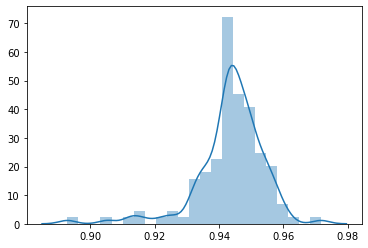

In [12]:
sns.distplot(scores)

In [13]:
all_vectors = []
for group in tqdm_notebook(test_data.group_id.unique()):
    texts = []
    for i in test_data[test_data['group_id'] == group].doc_id:
        texts.append(page_dict.get(i))
    vectorizer = TfidfVectorizer(max_features=300)
    vectors = vectorizer.fit_transform(texts)
    print(vectors.shape)
    all_vectors.append(vectors)

(98, 300)
(103, 300)
(89, 300)
(103, 300)
(95, 300)
(97, 300)
(95, 300)
(99, 300)
(86, 300)
(92, 300)
(97, 300)
(105, 300)
(90, 300)
(92, 300)
(82, 300)
(110, 300)
(47, 300)
(81, 300)
(100, 300)
(105, 300)
(98, 300)
(91, 300)
(108, 300)
(88, 300)
(89, 300)
(99, 300)
(96, 300)
(79, 300)
(101, 300)
(72, 300)
(93, 300)
(86, 300)
(95, 300)
(99, 300)
(101, 300)
(105, 300)
(100, 300)
(91, 300)
(99, 300)
(101, 300)
(93, 300)
(80, 300)
(99, 300)
(102, 300)
(88, 300)
(93, 300)
(103, 300)
(99, 300)
(85, 300)
(100, 300)
(86, 300)
(98, 300)
(108, 300)
(96, 300)
(52, 300)
(97, 300)
(99, 300)
(105, 300)
(102, 300)
(102, 300)
(71, 300)
(103, 300)
(99, 300)
(88, 300)
(98, 300)
(98, 300)
(97, 300)
(106, 300)
(101, 300)
(91, 300)
(98, 300)
(97, 300)
(71, 300)
(104, 300)
(95, 300)
(57, 300)
(98, 300)
(99, 300)
(104, 300)
(92, 300)
(95, 300)
(72, 300)
(92, 300)
(100, 300)
(88, 300)
(75, 300)
(101, 300)
(100, 300)
(95, 300)
(80, 300)
(103, 300)
(101, 300)
(98, 300)
(100, 300)
(101, 300)
(28, 300)
(100, 300

In [14]:
d = dict(zip(test_data.group_id.unique(), all_vectors))

In [15]:
predictions = {}
for group in tqdm_notebook(test_data.group_id.unique()):
    X = d.get(group)
    y_pred = OneClassSVM(gamma='scale', kernel='poly', nu=0.9).fit_predict(X)
    y_pred[np.where(y_pred == 1)] = 0
    y_pred[np.where(y_pred == -1)] = 1
    predictions[group] = y_pred

In [16]:
test_data['target'] = None

In [17]:
for group in test_data.group_id.unique():
    test_data.loc[test_data['group_id'] == group, 'target'] = predictions.get(group)

In [18]:
test_data[['pair_id', 'target']].to_csv('try_SVM.csv', index=None)